In [23]:
import requests
from bs4 import BeautifulSoup
import zipfile
import io
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import time

#Download and load dataset
def load_data():
    page_url = 'https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones'
    page_response = requests.get(page_url)
    if page_response.status_code == 200:
        soup = BeautifulSoup(page_response.content, 'html.parser')
        download_link = soup.select_one('a[href$=".zip"]')['href']
        full_download_url = 'https://archive.ics.uci.edu' + download_link
        response = requests.get(full_download_url)
        if response.status_code == 200:
            with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
                inner_zip_name = 'UCI HAR Dataset.zip'
                with outer_zip.open(inner_zip_name) as inner_zip_file:
                    with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
                        with inner_zip.open('UCI HAR Dataset/train/X_train.txt') as myfile:
                            df = pd.read_csv(myfile, delim_whitespace=True, header=None)
                        with inner_zip.open('UCI HAR Dataset/train/y_train.txt') as myfile_y:
                            y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)
    else:
        raise Exception("Failed to download or parse the dataset.")
    return df, y

<ipython-input-23-09043bbb2352>:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(myfile, delim_whitespace=True, header=None)
<ipython-input-23-09043bbb2352>:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)


Shape of X_train: (7352, 561)
Shape of y_train: (7352, 1)
Missing values in features: 0
Missing values in target: 0
               0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    ...  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000  ...   
mean     -0.604754    -0.630512    -0.526907    -0.606150  

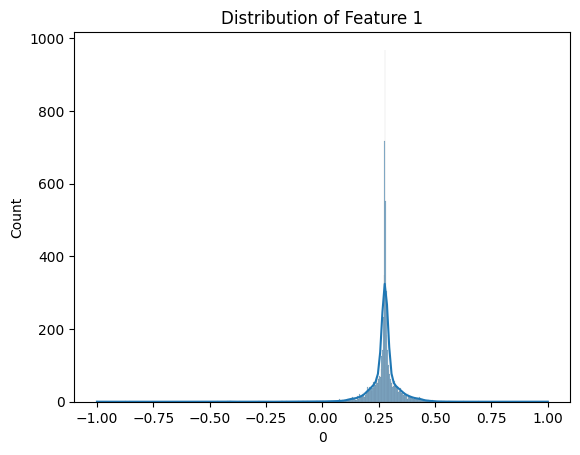

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import time

# Load dataset
df, y = load_data()

# Task 1: EDA

# Step 1: Dataset Dimensions
print(f"Shape of X_train: {df.shape}")
print(f"Shape of y_train: {y.shape}")

# Step 2: Check for Missing Values
print("Missing values in features:", df.isnull().sum().sum())
print("Missing values in target:", y.isnull().sum().sum())

# Step 3: Feature Overview
print(df.describe())  # Summary statistics of the features

# Step 4: Correlation Analysis
correlation_matrix = df.corr()
print("Correlation matrix:\n", correlation_matrix)

# Step 5: Visualize Feature Distributions (Example for the first feature)
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df[0], kde=True)
plt.title("Distribution of Feature 1")
plt.show()

In [25]:
# Task 2: Encode class labels

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y.values.ravel())

In [26]:
# Task 3: Scale the features using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [27]:
# Task 4: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train_full, X_test_full, y_train, y_test = train_test_split(
    df_scaled,
    encoded_y,
    test_size=0.2,
    random_state=42
)

In [28]:
#TASK 5 - 1. Create a pipeline using Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline([
    ('classifier', GaussianNB())
])

pipeline.fit(X_train_full, y_train)

y_pred = pipeline.predict(X_test_full)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.7315

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       247
           1       0.65      0.91      0.76       200
           2       0.83      0.76      0.79       206
           3       0.51      0.74      0.60       262
           4       0.80      0.89      0.84       276
           5       0.96      0.41      0.58       280

    accuracy                           0.73      1471
   macro avg       0.78      0.74      0.73      1471
weighted avg       0.78      0.73      0.73      1471



In [29]:
#TASK 6 - 1. Note the start time before defining the pipeline
#         2. Note the end time and report the difference as the time taken by the model training and inference.

import time

start_time = time.time()

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

pipeline = Pipeline([
    ('classifier', GaussianNB())
])

pipeline.fit(X_train_full, y_train)

y_pred = pipeline.predict(X_test_full)

end_time = time.time()

time_taken = end_time - start_time

print(f"Time Taken: {time_taken:.4f} seconds")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Time Taken: 0.0582 seconds
Accuracy Score: 0.7315

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       247
           1       0.65      0.91      0.76       200
           2       0.83      0.76      0.79       206
           3       0.51      0.74      0.60       262
           4       0.80      0.89      0.84       276
           5       0.96      0.41      0.58       280

    accuracy                           0.73      1471
   macro avg       0.78      0.74      0.73      1471
weighted avg       0.78      0.73      0.73      1471



In [30]:
# SOLUTION FOR TASK 5 and 6

# Define a Pipeline with Gaussian Naive Bayes and train it on the full dataset

start_time = time.time()
classifier_pipeline_full = Pipeline([
    ('classifier', GaussianNB())
])
classifier_pipeline_full.fit(X_train_full, y_train)
y_pred_full = classifier_pipeline_full.predict(X_test_full)
end_time = time.time()
full_features_time = end_time - start_time
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy Score: {accuracy_full:.4f}")

Accuracy Score: 0.7315


In [31]:
# TASK 7 - K-Means for dimensionality reduction
n_clusters = 50
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_scaled.T)  # Transpose to treat features as data points
selected_features_indices = [np.random.choice(np.where(kmeans.labels_ == i)[0]) for i in range(n_clusters)]
selected_features = df_scaled[:, selected_features_indices]

In [32]:
#TASK 8 - Train another model (GaussianNB) on the new dataset, and report time taken and accuracy

from sklearn.naive_bayes import GaussianNB
import time

start_time = time.time()

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    selected_features,  # Reduced features
    encoded_y,          # Target labels
    test_size=0.2,      # 20% for testing
    random_state=42,
    stratify=encoded_y
)

pipeline_reduced = Pipeline([
    ('classifier', GaussianNB())
])

pipeline_reduced.fit(X_train_reduced, y_train_reduced)

y_pred_reduced = pipeline_reduced.predict(X_test_reduced)

end_time = time.time()

time_taken_reduced = end_time - start_time

accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
print(f"Time Taken on Reduced Dataset: {time_taken_reduced:.4f} seconds")
print(f"Accuracy on Reduced Dataset: {accuracy_reduced:.4f}")

print("\nClassification Report on Reduced Dataset:")
print(classification_report(y_test_reduced, y_pred_reduced))


Time Taken on Reduced Dataset: 0.0193 seconds
Accuracy on Reduced Dataset: 0.8423

Classification Report on Reduced Dataset:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       245
           1       0.84      0.95      0.89       215
           2       0.85      0.79      0.82       197
           3       0.89      0.52      0.66       257
           4       0.69      0.92      0.79       275
           5       0.98      0.99      0.99       282

    accuracy                           0.84      1471
   macro avg       0.86      0.84      0.84      1471
weighted avg       0.86      0.84      0.84      1471

